# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Loading the dataset

In [2]:
# Define paths for training and testing datasets

data_train_path = r"C:\Users\Dell\Desktop\Visom6\Jewellery-Classification-master\dataset\training"
data_test_path = r"C:\Users\Dell\Desktop\Visom6\Jewellery-Classification-master\dataset\test"

In [3]:
# Standardizing Image Size

img_width, img_height = 180, 180

In [4]:
# Loading the training and testing datasets

data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 1566 files belonging to 5 classes.


In [5]:
data_train.class_names

['BRACELET', 'EARRINGS', 'NECKLACE', 'RINGS', 'WRISTWATCH']

In [6]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 250 files belonging to 5 classes.


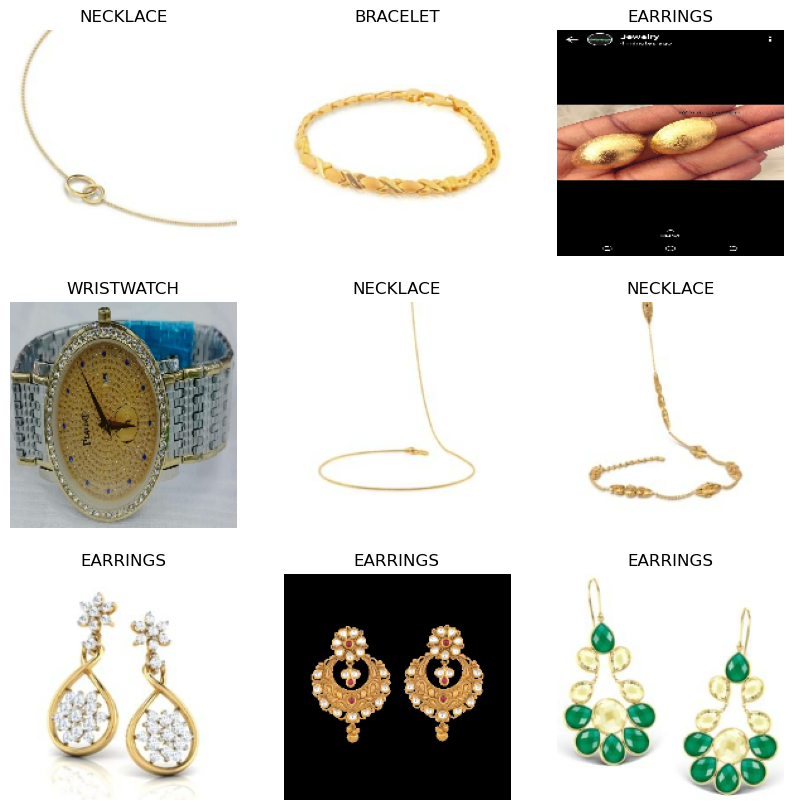

In [7]:
# Display some images from the training set

plt.figure(figsize=(10,10))
data_cat = data_train.class_names
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis("off")
plt.show()

# defining the model architecture

In [8]:
# Building the CNN model

classifier = Sequential([
    layers.Rescaling(1./255, input_shape=(img_width, img_height, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(data_cat), activation='softmax')
])

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# compile the model

In [9]:
classifier.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),      # Remove from_logits=True
    metrics=['accuracy']
)

# training the model

In [10]:
# Training the model

epochs_size = 25                            # originaly 25
history = classifier.fit(data_train, validation_data=data_test, epochs=epochs_size)

Epoch 1/25


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 284ms/step - accuracy: 0.4500 - loss: 1.3479 - val_accuracy: 0.7280 - val_loss: 0.9025
Epoch 2/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 279ms/step - accuracy: 0.8420 - loss: 0.5111 - val_accuracy: 0.8160 - val_loss: 0.5077
Epoch 3/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 320ms/step - accuracy: 0.9074 - loss: 0.2711 - val_accuracy: 0.8000 - val_loss: 0.5094
Epoch 4/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 319ms/step - accuracy: 0.9272 - loss: 0.2156 - val_accuracy: 0.7840 - val_loss: 0.6483
Epoch 5/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 292ms/step - accuracy: 0.9447 - loss: 0.1648 - val_accuracy: 0.8000 - val_loss: 0.6728
Epoch 6/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 299ms/step - accuracy: 0.9518 - loss: 0.1250 - val_accuracy: 0.8520 - val_loss: 0.6785
Epoch 7/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 301ms/step - accuracy: 0.9663 - loss: 0.0913 - val_accuracy: 0.8440 - val_loss: 0.5330
Epoch 8/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 275ms/step - accuracy: 0.9802 - loss: 0.0547 - val_accuracy: 0.856

# evaluating the model

In [11]:
# Evaluating the model on the training data
train_score = classifier.evaluate(data_train)

print("Training Loss:", train_score[0])
print("Training Accuracy:", train_score[1])

49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 1.0000 - loss: 3.0486e-05
Training Loss: 2.898711863963399e-05
Training Accuracy: 1.0


In [12]:
# Evaluating the model on the test data
test_score = classifier.evaluate(data_test)

print("Test Loss:", test_score[0])
print("Test Accuracy:", test_score[1])

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8775 - loss: 1.0722
Test Loss: 1.4915201663970947
Test Accuracy: 0.8360000252723694


# predicting on new data

In [13]:
# Predicting on a single image

image_1_path = r"C:\Users\Dell\Downloads\jewellery test_1.jpeg"
image_1 = tf.keras.utils.load_img(image_1_path, target_size=(img_height, img_width))
img_arr = tf.keras.utils.img_to_array(image_1)
img_bat = tf.expand_dims(img_arr, 0)  # Expand dimensions to match the input shape

predict = classifier.predict(img_bat)
score = tf.nn.softmax(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


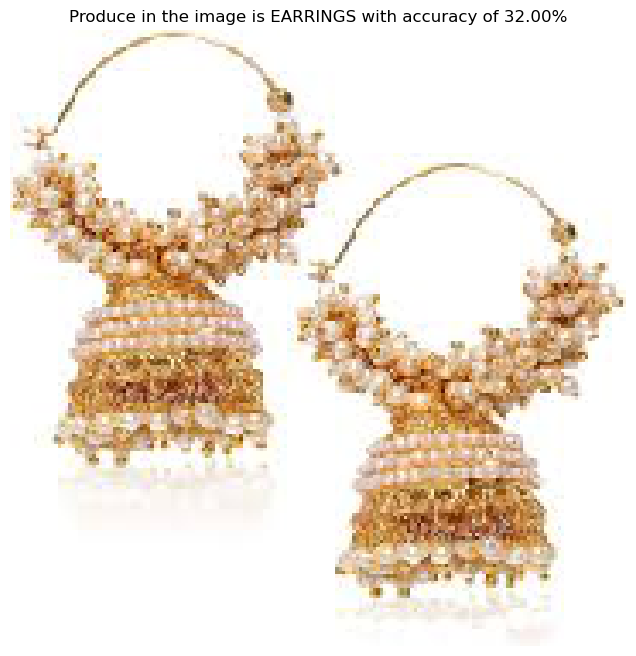

In [14]:
# Display the image with the prediction and accuracy
plt.figure(figsize=(8, 8))
plt.imshow(image_1)
plt.axis('off')  # Hide the axes
plt.title(f'Produce in the image is {data_cat[np.argmax(score)]} with accuracy of {np.max(score)*100:.2f}%')
plt.show()

# new image

In [15]:
# Predicting on a new image
image_2_path = r"C:\Users\Dell\Downloads\jewellery test2.jpeg"
image_2 = tf.keras.utils.load_img(image_2_path, target_size=(img_height, img_width))
img_arr_2 = tf.keras.utils.img_to_array(image_2)
img_bat_2 = tf.expand_dims(img_arr_2, 0)  # Expand dimensions to match the input shape

In [16]:
predict_2 = classifier.predict(img_bat_2)
score_2 = tf.nn.softmax(predict_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


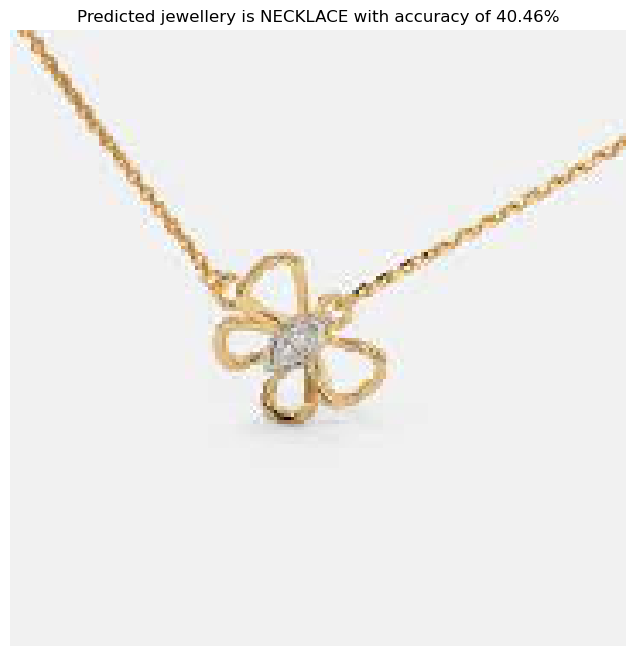

In [17]:
# Display the image with the prediction and accuracy
plt.figure(figsize=(8, 8))
plt.imshow(image_2)
plt.axis('off')  # Hide the axes
plt.title(f'Predicted jewellery is {data_cat[np.argmax(score_2)]} with accuracy of {np.max(score_2)*100:.2f}%')
plt.show()

# New Image

In [18]:
# Predicting on a new image
image_3_path = r"C:\Users\Dell\Downloads\jewellery test 3.jpeg"
image_3 = tf.keras.utils.load_img(image_3_path, target_size=(img_height, img_width))
img_arr_3 = tf.keras.utils.img_to_array(image_3)
img_bat_3 = tf.expand_dims(img_arr_3, 0)  # Expand dimensions to match the input shape

In [19]:
predict_3 = classifier.predict(img_bat_3)
score_3 = tf.nn.softmax(predict_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


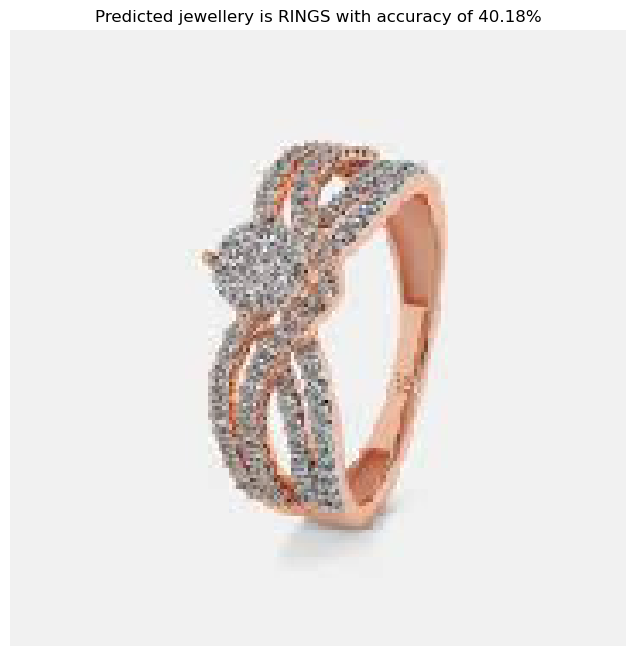

In [20]:
# Display the image with the prediction and accuracy
plt.figure(figsize=(8, 8))
plt.imshow(image_3)
plt.axis('off')  # Hide the axes
plt.title(f'Predicted jewellery is {data_cat[np.argmax(score_3)]} with accuracy of {np.max(score_3)*100:.2f}%')
plt.show()